In [ ]:
import pandas as pd

df = pd.read_csv("datasets/calories.csv")
X = df.drop(['Duration', 'Date', 'Pulse'], axis=1).dropna()
X.head()

,Maxpulse,Calories
0,130,409.1
1,145,479.0
2,135,340.0
3,175,282.4
4,148,406.0


In [68]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2, random_state=42).fit(X)
model.means_, model.covariances_, model.weights_

(array([[127.58468134, 322.4929177 ],
        [131.76617794, 267.26395185]]),
 array([[[  68.89943338,  470.95599603],
         [ 470.95599603, 4506.69210172]],
 
        [[ 354.79331147,   90.87768832],
         [  90.87768832, 1524.32402511]]]),
 array([0.67747146, 0.32252854]))

In [69]:
Y = model.predict(X)
Y

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

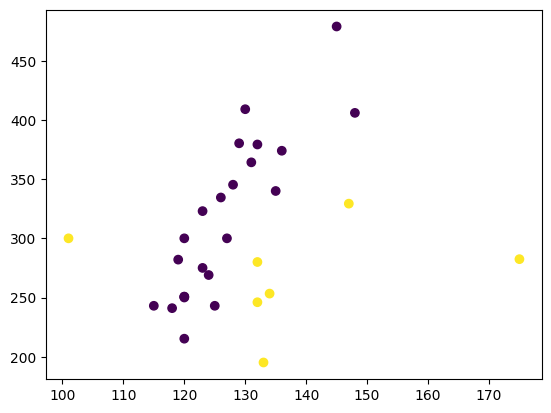

In [70]:
import matplotlib.pyplot as plt
plt.scatter(X['Maxpulse'], X['Calories'], c=Y)

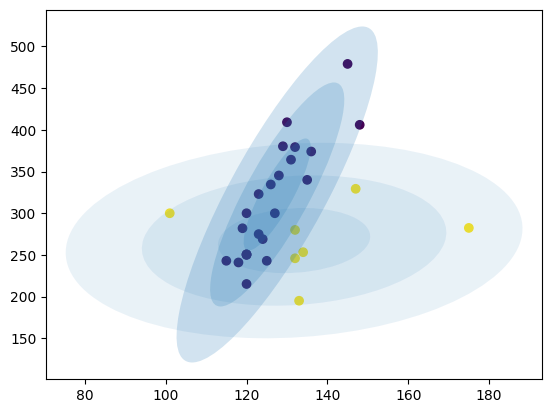

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, width=nsig * width, height=nsig * height, angle=angle, **kwargs))

ax = plt.gca()
ax.scatter(X['Maxpulse'], X['Calories'], c=Y)

w_factor = 0.2 / model.weights_.max()
for pos, covar, w in zip(model.means_, model.covariances_, model.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)